Stock Market Prediction Using Linear Regression
Name -Md Shakir
Roll no-2101331520088
Branch/Section -AI-A
Submitted to -Mr. Roop Singh


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
tcs_data=pd.read_csv('/content/TCS.csv')

In [ ]:
tcs_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [ ]:
tcs_data['Date']=pd.to_datetime(tcs_data['Date'])


In [ ]:
tcs_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [ ]:
tcs_data.shape


(4139, 15)

In [ ]:
tcs_data.isnull().sum()


Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [ ]:
tcs_data.drop('Trades',axis=1,inplace=True)


In [ ]:
tcs_data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
tcs_data.isna().any()

Date                  False
Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Deliverable Volume    False
%Deliverble           False
dtype: bool

In [ ]:
tcs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4139 non-null   datetime64[ns]
 1   Symbol              4139 non-null   object        
 2   Series              4139 non-null   object        
 3   Prev Close          4139 non-null   float64       
 4   Open                4139 non-null   float64       
 5   High                4139 non-null   float64       
 6   Low                 4139 non-null   float64       
 7   Last                4139 non-null   float64       
 8   Close               4139 non-null   float64       
 9   VWAP                4139 non-null   float64       
 10  Volume              4139 non-null   int64         
 11  Turnover            4139 non-null   float64       
 12  Deliverable Volume  4139 non-null   int64         
 13  %Deliverble         4139 non-null   float64     

In [ ]:
tcs_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,3.155626e+07,0.962200


<Axes: >

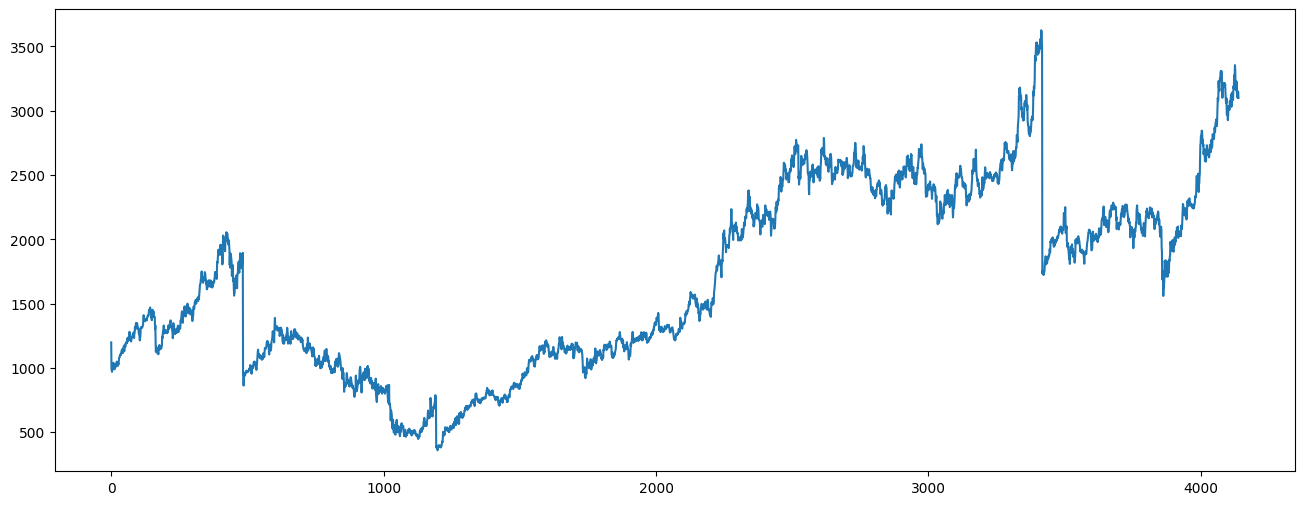

In [ ]:
tcs_data['Open'].plot(figsize=(16,6))

In [ ]:
X=tcs_data[['Open','High','Low','Volume']]
y=tcs_data['Close']


In [ ]:
[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=0.3,random_state=5)
print(X.shape,X_train.shape,X_test.shape)

(4139, 4) (2897, 4) (1242, 4)


In [ ]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-4.95260969e-01,  7.49006708e-01,  7.46085067e-01,  7.00324005e-08])

In [ ]:
lm.intercept_

0.2859027291779057

In [ ]:
predicted=lm.predict(X_test)

In [ ]:
print(predicted)

[1881.30628157  537.21269944 2217.72740236 ... 2652.53417659 1824.76379079
 1098.76110787]


In [ ]:
df=pd.DataFrame({'Actual ':y_test,'Predicted':predicted})

In [ ]:
print(df)

      Actual     Predicted
3534  1878.25  1881.306282
1067   534.80   537.212699
3669  2231.50  2217.727402
2180  1514.10  1506.193250
2530  2506.05  2502.671153
...       ...          ...
2195  1443.80  1447.785636
1420   735.10   731.573831
3277  2665.55  2652.534177
3884  1818.55  1824.763791
33    1100.65  1098.761108

[1242 rows x 2 columns]


<Axes: >

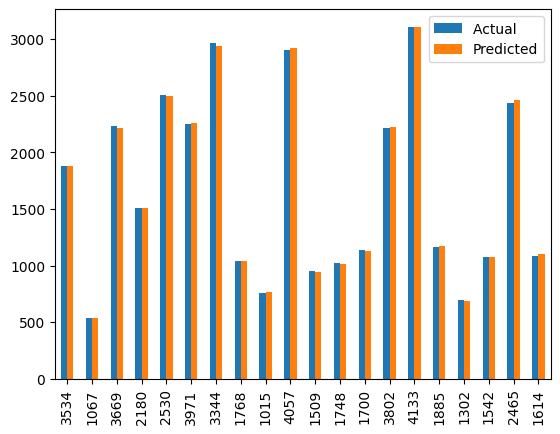

In [ ]:
graph=df.head(20)
graph.plot(kind='bar')

In [ ]:
print(y_test.dtype)
print(predicted.dtype)

float64
float64


In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Absolute Error: 8.365753118027108
Mean Squared Error: 179.78918862383566
R2 Score: 0.9996544781377865
